Perguntas

*   Os atributos "imutáveis" (sexo, raça, país de origem...) do trabalhador são menos ou mais determinantes que os demais (como escolaridade) para predizer seu salário?  E para predizer se ele ganha acima de 50 mil dólares anuais?
*   De modo semelhante, qual a menor combinação de atributos que melhor prediz o salário de um trabalhador? E que prediz se ele ganha mais de 50 mil dólares anuais?

*   Com qual precisão conseguimos prever o salário de um trabalhador, baseado em seus atributos, a partir do dataset selecionado? E baseado apenas nos grupos de atributos das perguntas anteriores?

*   Existe algum atributo que é fortemente correlacionado com outros?


In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import math
import scipy

plt.style.use('seaborn-colorblind')

plt.rcParams['figure.figsize']  = (12, 18)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4
plt.ion()

In [71]:
# Load datasets
dataset = pd.read_csv('./databases/adult_data.csv')
print(dataset.dtypes)

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 salary            object
dtype: object


In [72]:
# Arrumando o nome das colunas
column_new_names = {}
for c in dataset.columns[1:]:
    column_new_names[c] = c.split(' ')[1].replace('-', '_')
    
dataset = dataset.rename(columns=column_new_names)
dataset.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Exploração inicial

In [73]:
# Quantidade de homens e mulheres
print(dataset.columns)

n_man = dataset['sex'] == ' Male'
n_man = n_man.sum()
n_woman = dataset['sex'] == ' Female' 
n_woman = n_woman.sum()
print("n_man: ",n_man,'n_woman:' ,n_woman)


# Quantidade de pessoas com salário alto e baixo
pd.DataFrame({'count': dataset.salary.value_counts(), '%': dataset.salary.value_counts(normalize = True)})


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')
n_man:  21790 n_woman: 10771


,count,%
<=50K,24720,0.75919
>50K,7841,0.24081


# Age

In [74]:
# Eu:
# Age
# Workclass
# Education-num


# Distribuição 

# for i in df.columns:
i = 'age' 
# print(i)
# try: 
#     dataset[i].plot.hist(bins = 73)
#     plt.show()
# except:
#     plt.barh(dataset[i].value_counts().index, dataset[i].value_counts().values)
#     plt.show()


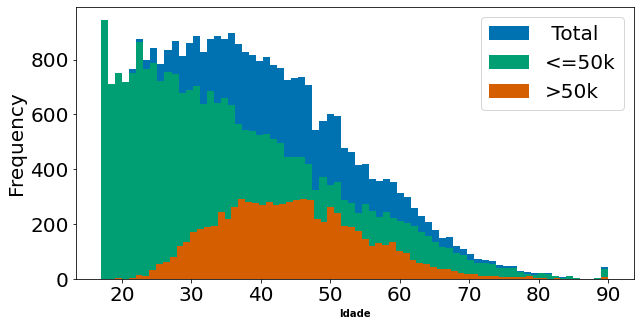

In [75]:
fig=plt.figure(figsize=(10, 5), facecolor='w', edgecolor='k')

def define_classe(string):
    if string == ' >50K':
        return 1
    elif string == ' <=50K':
        return 0
    return None

#Prepara o dataset
column_name = 'age'
age_data = dataset.groupby([column_name, 'salary'])["education_num"].count().reset_index(name="count")

age_data['salary'] = age_data['salary'].map(define_classe)
all_ages = age_data[column_name].unique()
# print(age_data)

df_aux = dataset.copy()
df_aux['salary'] = df_aux['salary'].map(define_classe)

less50k = df_aux[df_aux['salary'] == 0]
more50k = df_aux[df_aux['salary'] == 1]
all_data = df_aux

plt.xlabel('Idade', fontweight ='bold', fontsize = 10) #Lembrar de trocar o xlabel se for usar <<<
# plt.ylabel('Quantidade', fontweight ='bold', fontsize = 10)
all_data[column_name].plot.hist(bins = 72, label=' Total')
less50k[column_name].plot.hist(bins = 72, label= '<=50k')
more50k[column_name].plot.hist(bins = 72, label= '>50k')

plt.legend()
# print(df_aux)



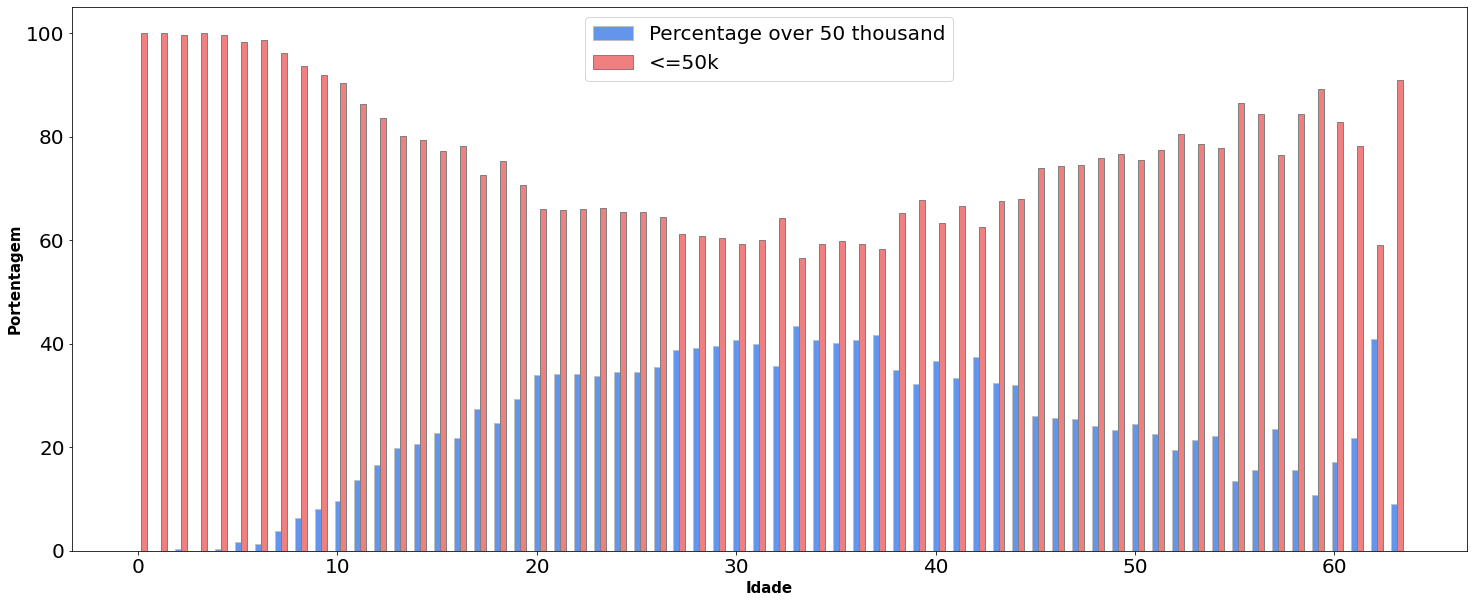

In [76]:

column_name = 'age'
#Prepara o dataset
new_dataset = dataset.groupby([column_name, 'salary'])["education_num"].count().reset_index(name="count")

# print (new_dataset)
b_width = 0.35

less = np.zeros(91)
more = np.zeros(91)

#Pega os itens das tuplas
for item in new_dataset.itertuples():
    if item[2] == " <=50K":
        less[item[1]] = item[3]
    else:
        more[item[1]] = item[3] 

less = less[17:]
more= more[17:]

# Calcular a quantidade total de pessoas em cada idade
total_df = dataset.groupby([column_name])["education_num"].count().reset_index(name="count")

total = np.zeros(91)
for item in total_df.itertuples():
    total[item[1]] = item[2]

total = total[17:81]
b_width = 0.3
# Calcular fração de pessoas com mais de 
fraction_more = np.zeros(91)
fraction_less = np.zeros(91)
fraction_less = fraction_less[17:81]
fraction_more = fraction_more[17:81]
for i in range(len(total)):
    fraction_more[i] = (more[i]/total[i])*100
    fraction_less[i] = (less[i]/total[i])*100

fig = plt.subplots(figsize=(25,10))
br1 = np.arange(len(fraction_more))
br2 = [x + b_width for x in br1]

plt.bar(br1, fraction_more, color ='cornflowerblue', width = b_width,
        edgecolor ='silver', label ='Percentage over 50 thousand')
plt.bar(br2, fraction_less, color ='lightcoral', width = b_width,
        edgecolor ='grey', label ='<=50k')

#Nomeia os eixos.
plt.xlabel('Idade', fontweight ='bold', fontsize = 15)
plt.ylabel('Portentagem', fontweight ='bold', fontsize = 15)

plt.legend()

# Marital_Status_Plot

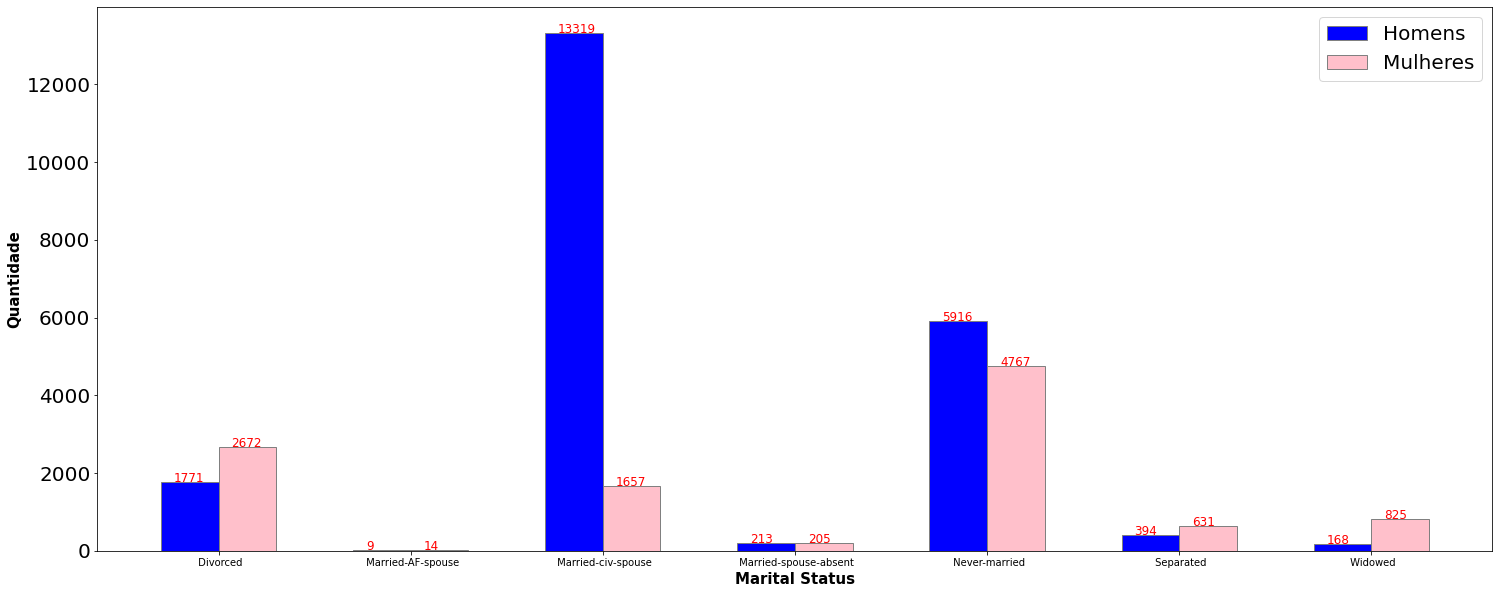

In [77]:
#Marital_Status_Plot

column_name = 'marital_status'
#Prepara o dataset
new_dataset = dataset.groupby([column_name,'sex'])["age"].count().reset_index(name="count")
all_marital_status = new_dataset[column_name].unique()
b_width = 0.30


men = list()
women = list()

#Pega os itens das tuplas, prq eu tava apanhando mt para o plot do dataframe :P.
for item in new_dataset.itertuples():
    if item[2] == " Male":
        men.append(item[3])
    else:
        women.append(item[3])

#Configura a quantidade de barras e o posicionamento das mesmas.
br1 = np.arange(len(men))
br2 = [x + b_width for x in br1]

fig = plt.subplots(figsize=(25,10))

#Cria as barras.
bar1 = plt.bar(br1, men, color ='blue', width = b_width,
        edgecolor ='grey', label ='Homens')
bar2 = plt.bar(br2, women, color ='pink', width = b_width,
        edgecolor ='grey', label ='Mulheres')
bar_list = [bar1, bar2]

#Nomeia os eixos.
plt.xlabel('Marital Status', fontweight ='bold', fontsize = 15) #Lembrar de trocar o xlabel se for usar <<<
plt.ylabel('Quantidade', fontweight ='bold', fontsize = 15)

#Coloca todas as categorias no eixo X (Estado Marital, Profissão ou Escolaridade) e configura as disposições.
plt.xticks([r + b_width/2 for r in range(len(men))], all_marital_status, fontsize=10, ha="center")

#Coloca as quantidades em cima dos barplots.
for bars in bar_list:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x()+ 0.067, yval + .05, yval, fontsize=12, color="red", ha="left")

plt.legend()

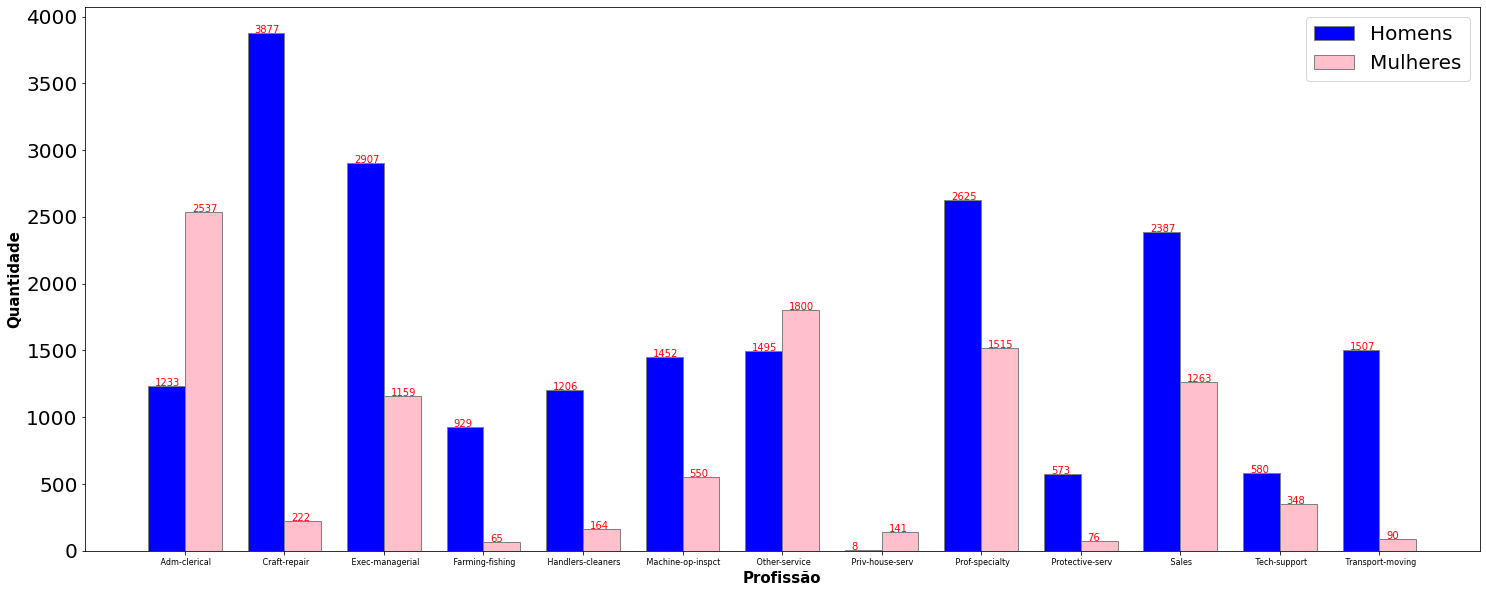

In [78]:
#Profession_Plot
column_name = 'occupation'

new_dataset = dataset.groupby([column_name,'sex'])["age"].count().reset_index(name="count")
new_dataset = new_dataset.drop([0,1,4], axis=0)
all_marital_status = new_dataset[column_name].unique()

b_width = 0.37

men = list()
women = list()
for item in new_dataset.itertuples():
    if item[2] == " Male":
        men.append(item[3])
    else:
        women.append(item[3])

br1 = np.arange(len(men))
br2 = [x + b_width for x in br1]

fig = plt.subplots(figsize=(25,10))

bar1 = plt.bar(br1, men, color ='b', width = b_width,
        edgecolor ='grey', label ='Homens')
bar2 = plt.bar(br2, women, color ='pink', width = b_width,
        edgecolor ='grey', label ='Mulheres')
bar_list = [bar1, bar2]

plt.xlabel('Profissão', fontweight ='bold', fontsize = 15)
plt.ylabel('Quantidade', fontweight ='bold', fontsize = 15)

plt.xticks([r + b_width/2 for r in range(len(men))], all_marital_status, fontsize=8, ha="center")
for bars in bar_list:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x()+0.07 , yval + .05, yval, fontsize=10, color="red")
plt.legend()

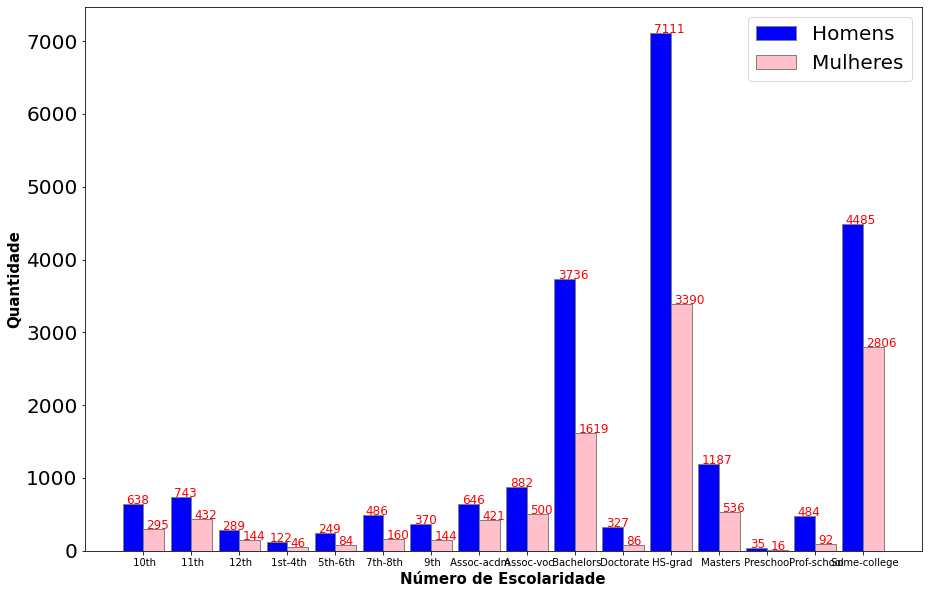

In [79]:
#Plot da Escolaridade
column_name = 'education'

new_dataset = dataset.groupby([column_name,'sex'])["age"].count().reset_index(name="count")
all_marital_status = new_dataset[column_name].unique()

b_width = 0.43

men = list()
women = list()
for item in new_dataset.itertuples():
    if item[2] == " Male":
        men.append(item[3])
    else:
        women.append(item[3])

br1 = np.arange(len(men))
br2 = [x + b_width for x in br1]
fig = plt.subplots(figsize=(15,10))

bar1 = plt.bar(br1, men, color ='b', width = b_width,
        edgecolor ='grey', label ='Homens')
bar2 = plt.bar(br2, women, color ='pink', width = b_width,
        edgecolor ='grey', label ='Mulheres')
bar_list = [bar1, bar2]

plt.xlabel('Número de Escolaridade', fontweight ='bold', fontsize = 15)
plt.ylabel('Quantidade', fontweight ='bold', fontsize = 15)

plt.xticks([r + b_width/2 for r in range(len(men))], all_marital_status, fontsize=10, ha="center")
for bars in bar_list:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x()+ 0.07, yval + .05, yval, fontsize=12, color="red", ha="left")
plt.legend()

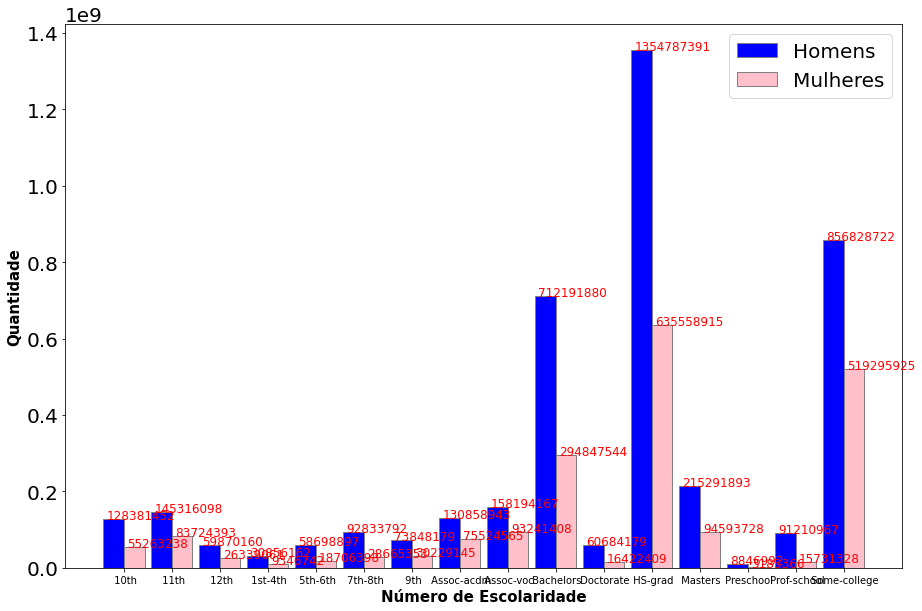

In [80]:
#Plot da Escolaridade
column_name = 'education'

new_dataset = dataset.groupby([column_name,'sex'])["fnlwgt"].sum().reset_index(name="count")
all_marital_status = new_dataset[column_name].unique()

b_width = 0.43

men = list()
women = list()
for item in new_dataset.itertuples():
    if item[2] == " Male":
        men.append(item[3])
    else:
        women.append(item[3])

br1 = np.arange(len(men))
br2 = [x + b_width for x in br1]
fig = plt.subplots(figsize=(15,10))

bar1 = plt.bar(br1, men, color ='b', width = b_width,
        edgecolor ='grey', label ='Homens')
bar2 = plt.bar(br2, women, color ='pink', width = b_width,
        edgecolor ='grey', label ='Mulheres')
bar_list = [bar1, bar2]

plt.xlabel('Número de Escolaridade', fontweight ='bold', fontsize = 15)
plt.ylabel('Quantidade', fontweight ='bold', fontsize = 15)

plt.xticks([r + b_width/2 for r in range(len(men))], all_marital_status, fontsize=10, ha="center")
for bars in bar_list:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x()+ 0.07, yval + .05, yval, fontsize=12, color="red", ha="left", label="com fnlwgt")
plt.legend()

# Native country

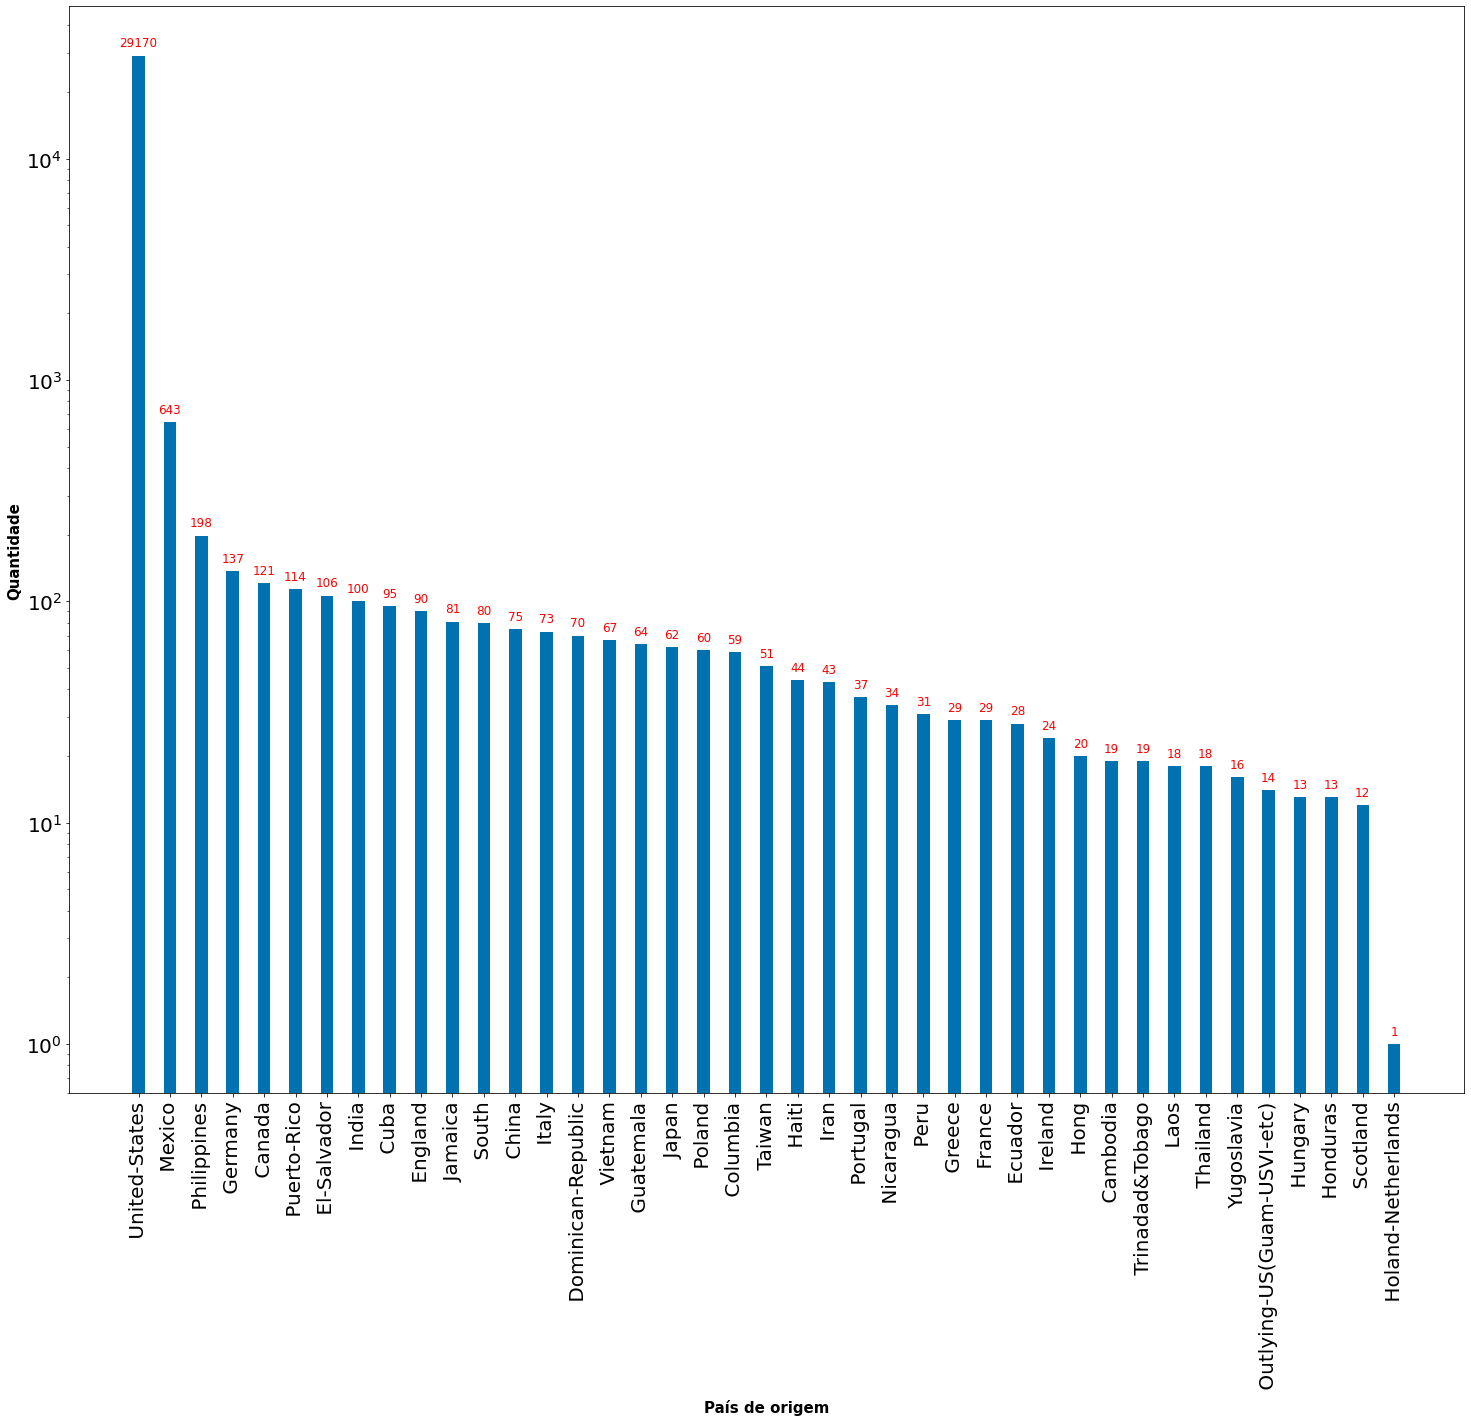

In [81]:
country = dataset.groupby(['native_country'])['age'].count().sort_values(ascending=False)
country_df = pd.DataFrame(country)
country_df.columns = ['count']
country_df = country_df[country_df.index != ' ?']
country_x = np.arange(len(country_df))*2
plt.subplots(figsize=(25,20))
graph = plt.bar(country_x,country_df['count'])
plt.xticks(country_x, country_df.index, rotation = '90')
plt.yscale('log')
plt.xlabel('País de origem', fontweight ='bold', fontsize = 15)
plt.ylabel('Quantidade', fontweight ='bold', fontsize = 15)
for index, value in enumerate(graph):
  plt.text(country_x[index], value.get_height() + .1*math.exp(math.log(value.get_height())), value.get_height(), fontsize=12, color="red", ha="center")

# Salary

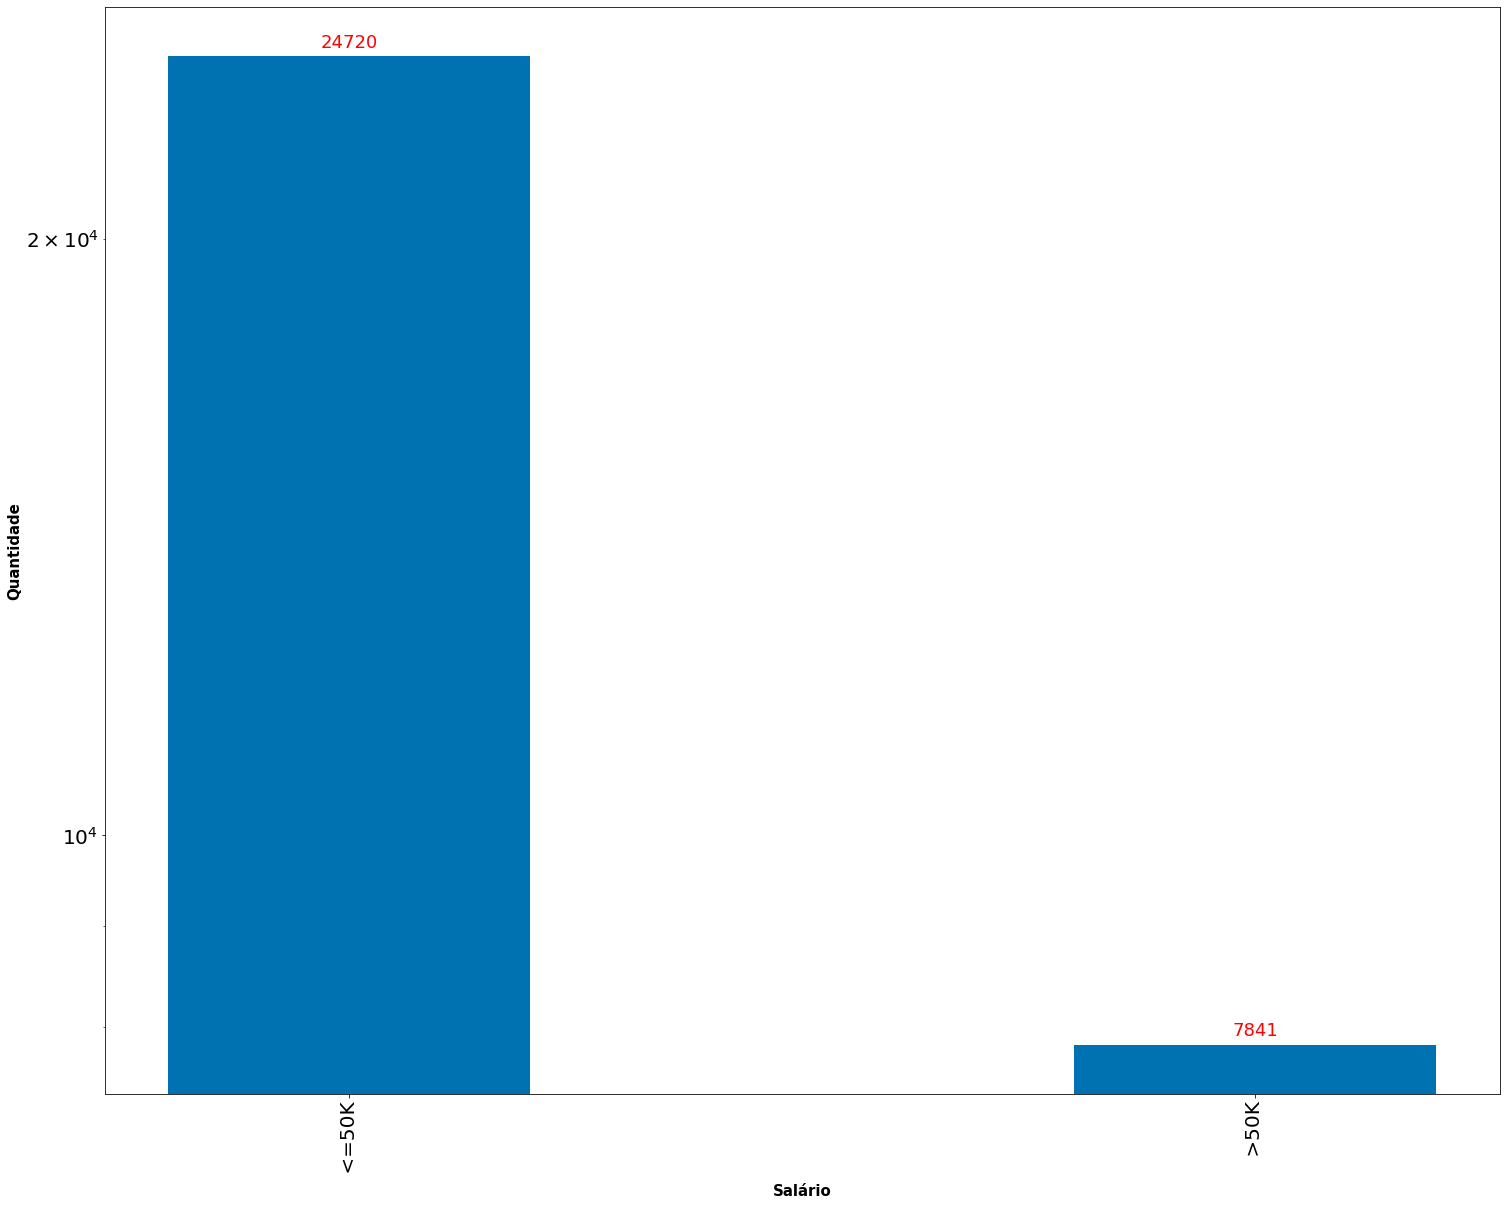

In [82]:
salary = dataset.groupby(['salary'])["age"].count().sort_values(ascending=False)
salary_df = pd.DataFrame(salary)
salary_df.columns = ['count']
salary_df = salary_df[salary_df.index != ' ?']
salary_x = np.arange(len(salary_df))*2
plt.subplots(figsize=(25,20))
graph = plt.bar(salary_x,salary_df['count'])
plt.xticks(salary_x, salary_df.index, rotation = '90')
plt.yscale('log')
plt.xlabel('Salário', fontweight ='bold', fontsize = 15)
plt.ylabel('Quantidade', fontweight ='bold', fontsize = 15)
for index, value in enumerate(graph):
  plt.text(salary_x[index], value.get_height() + .01*math.exp(math.log(value.get_height())), value.get_height(), fontsize=18, color="red", ha="center")

# Education

## Distribuição

## Comparação

{' 10th': 6, ' 11th': 7, ' 12th': 8, ' 1st-4th': 2, ' 5th-6th': 3, ' 7th-8th': 4, ' 9th': 5, ' Assoc-acdm': 12, ' Assoc-voc': 11, ' Bachelors': 13, ' Doctorate': 16, ' HS-grad': 9, ' Masters': 14, ' Preschool': 1, ' Prof-school': 15, ' Some-college': 10}
{' Preschool': 100.0, ' 1st-4th': 96.42857142857143, ' 5th-6th': 95.1951951951952, ' 7th-8th': 93.80804953560371, ' 9th': 94.74708171206225, ' 10th': 93.35476956055734, ' 11th': 94.8936170212766, ' 12th': 92.37875288683603, ' HS-grad': 84.04913817731645, ' Some-college': 80.97654642710191, ' Assoc-voc': 73.87843704775688, ' Assoc-acdm': 75.16401124648547, ' Bachelors': 58.52474323062559, ' Masters': 44.34126523505514, ' Prof-school': 26.5625, ' Doctorate': 25.907990314769975}
{' Preschool': 0.0, ' 1st-4th': 3.571428571428571, ' 5th-6th': 4.804804804804805, ' 7th-8th': 6.191950464396285, ' 9th': 5.252918287937743, ' 10th': 6.645230439442658, ' 11th': 5.106382978723404, ' 12th': 7.621247113163972, ' HS-grad': 15.950861822683555, ' Some-c

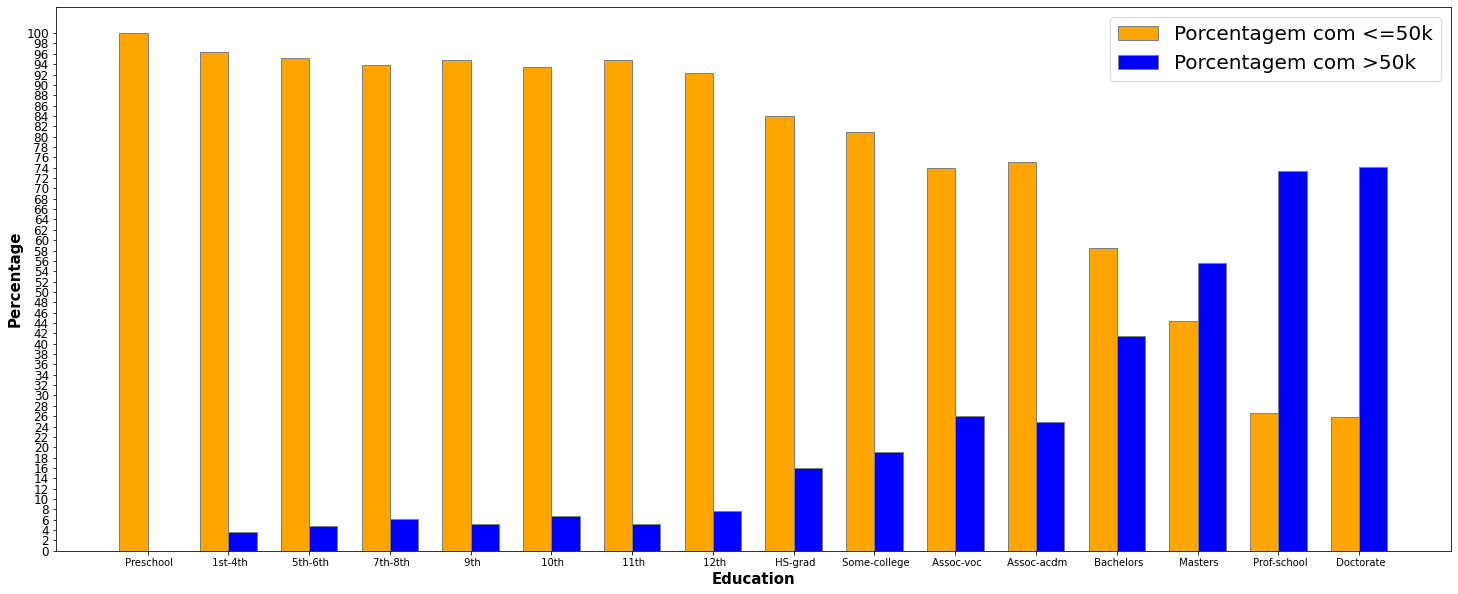

In [83]:
# Education-num

column_name = 'education'
secondary = 'education_num'
#Prepara o dataset
new_dataset = dataset.groupby([column_name,secondary , 'salary'])["education_num"].count().reset_index(name="count")
# all_educations = new_dataset[column_name].unique()

# print(new_dataset)

# Guarda relação nome - número
educations = dict(zip(new_dataset['education'], new_dataset['education_num']))
print(educations)

all_educations = list()
for i in sorted(educations, key = educations.get):
    all_educations.append(i)


key_list = all_educations
value_list = np.zeros(len(all_educations))

education_less_dict = dict(zip(key_list, value_list))
education_more_dict = dict(zip(key_list, value_list))
education_all_dict = dict(zip(key_list, value_list))

# display (new_dataset)

for item in new_dataset.itertuples():
    if item[3] == " <=50K":
        education_less_dict[item[1]] = item[4]
    else:
        education_more_dict[item[1]] = item[4]
    education_all_dict[item[1]] = education_all_dict[item[1]] + item[4]

# print(education_less_dict)
# print(education_more_dict)

# Calcular fração
fraction_less = dict(zip(key_list, value_list))
fraction_more = dict(zip(key_list, value_list))
for key in education_all_dict:
    fraction_less[key] = (education_less_dict[key] / education_all_dict[key])*100
    fraction_more[key] = (education_more_dict[key] / education_all_dict[key])*100

print(fraction_less)
print(fraction_more)

#Configura a quantidade de barras e o posicionamento das mesmas.

b_width = 0.35
br1 = np.arange(len(fraction_less.values()))
br2 = [x + b_width for x in br1]

fig = plt.subplots(figsize=(25,10))

#Cria as barras.
bar1 = plt.bar(br1, fraction_less.values(), color ='orange', width = b_width,
        edgecolor ='grey', label ='Porcentagem com <=50k')
bar2 = plt.bar(br2, fraction_more.values(), color ='blue', width = b_width,
        edgecolor ='grey', label ='Porcentagem com >50k')
bar_list = [bar1, bar2]

#Nomeia os eixos.
plt.xlabel('Education', fontweight ='bold', fontsize = 15) #Lembrar de trocar o xlabel se for usar <<<
plt.ylabel('Percentage', fontweight ='bold', fontsize = 15)

#Coloca todas as categorias no eixo X
plt.xticks([r + b_width/2 for r in range(len(fraction_less.values()))], all_educations, fontsize=10, ha="center")
plt.yticks(np.arange(0, 102, 2),fontsize=12)
plt.legend()

## CDF

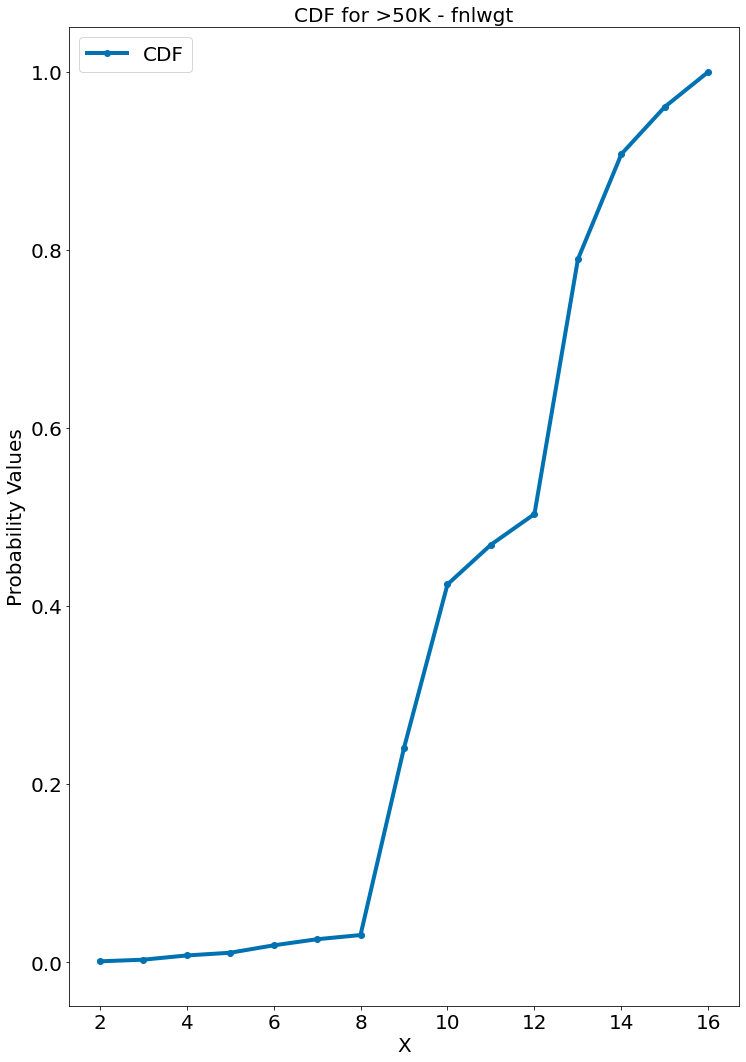

In [84]:
#levando em consideração o final weigth
salary_above = dataset.drop(dataset[(dataset.salary == ' <=50K')].index)
sadf = salary_above.groupby(['education_num','fnlwgt']).count()
sadf=sadf.reset_index('education_num')
sadf=sadf.reset_index('fnlwgt')
sadf['rcount'] = sadf['age']*sadf['fnlwgt']
sadf = sadf.groupby(['education_num'])['rcount'].sum().reset_index()
x=sadf['education_num'].to_numpy()
np.append(x,1)
frequency=sadf['rcount'].to_numpy()
np.append(frequency,0)
pdf=frequency/np.sum(frequency)
cdf=np.cumsum(pdf)
plt.plot(x,cdf,marker="o",label="CDF")
plt.xlabel("X")
plt.ylabel("Probability Values")
plt.title("CDF for >50K - fnlwgt")
plt.legend()
plt.show()

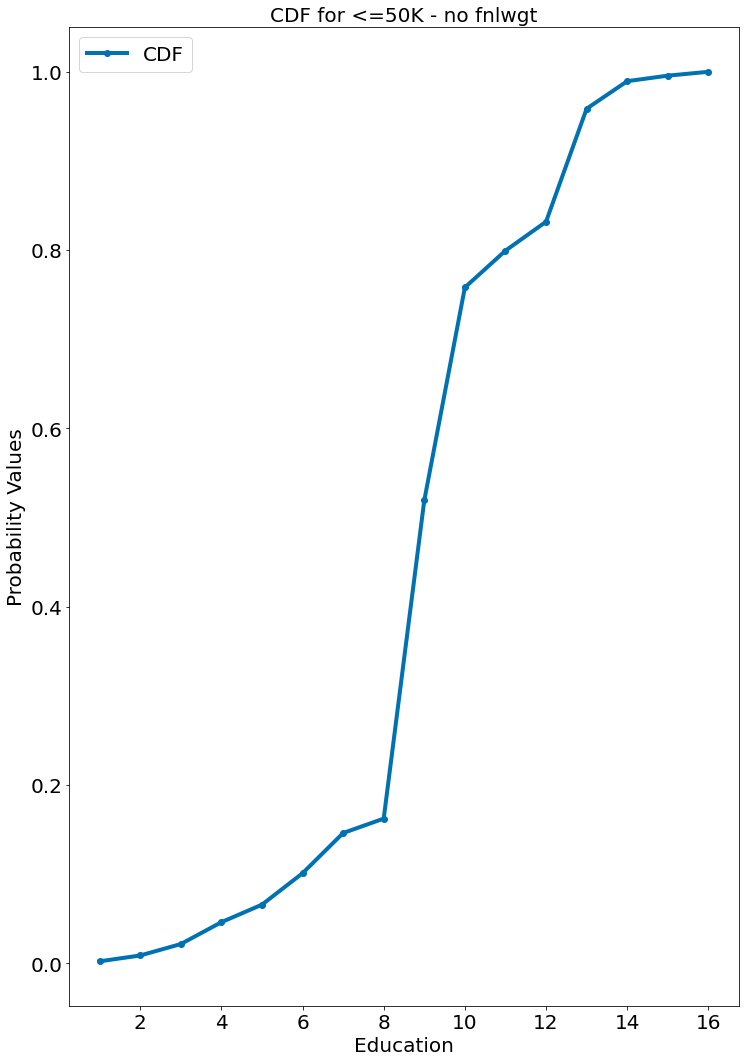

In [85]:
#sem levar em consideração o final weigth
salary_below = dataset.drop(dataset[(dataset.salary == ' >50K')].index)
sbdf2 = salary_below.groupby(['education_num']).count()
sbdf2=sbdf2.reset_index('education_num')
x3=sbdf2['education_num'].to_numpy()
frequency3=sbdf2['age'].to_numpy()
pdf3=frequency3/np.sum(frequency3)
cdf3=np.cumsum(pdf3)
plt.plot(x3,cdf3,marker="o",label="CDF")
plt.xlabel("Education")
plt.ylabel("Probability Values")
plt.title("CDF for <=50K - no fnlwgt")
plt.legend()
plt.show()

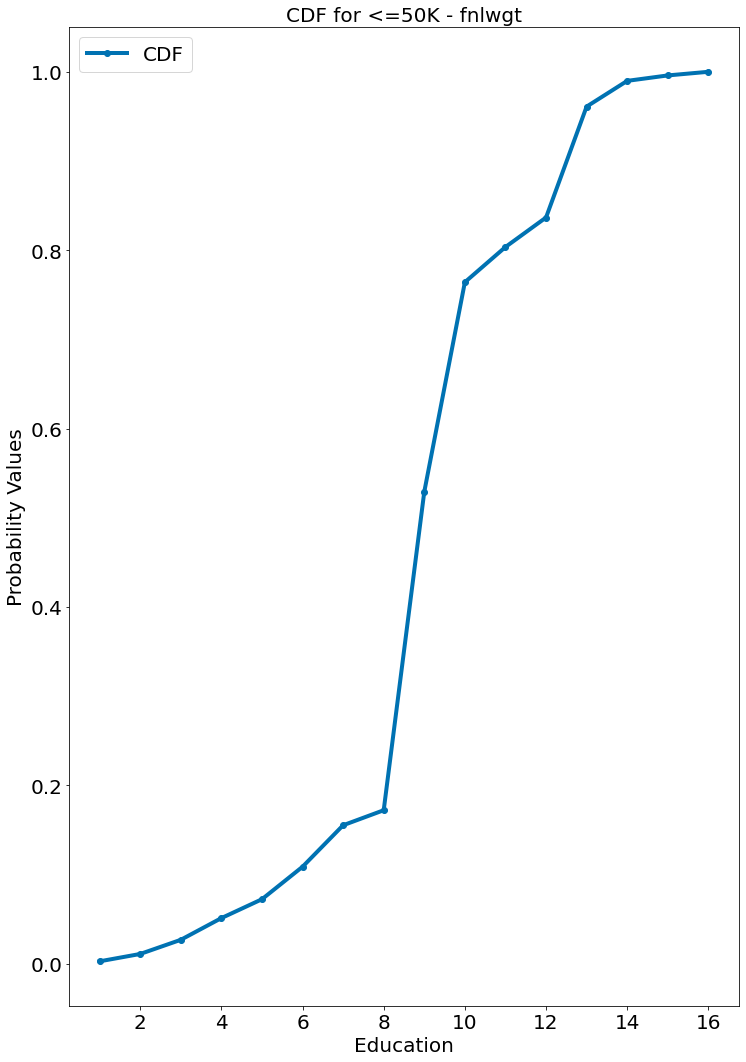

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[  1378427   2693641   7008934   4482618  12270983  10110694   6947969
 309856300 270667463  65795788  50722495 421846132 174135169  78299425
  57931167]
[  12030358   38824477   74711654  114490211   99594706  171373707
  218929797   79261252 1680490006 1105457184  185639787  155661013
  585193292  135750452   28642870   19175421]
[  51  162  317  606  487  871 1115  400 8826 5904 1021  802 3134  764
  153  107]


In [86]:
#levando em consideração o final weigth
sbdf = salary_below.groupby(['education_num','fnlwgt']).count()
sbdf=sbdf.reset_index('education_num')
sbdf=sbdf.reset_index('fnlwgt')
sbdf['rcount'] = sbdf['age']*sbdf['fnlwgt']
sbdf = sbdf.groupby(['education_num'])['rcount'].sum().reset_index()
x2=sbdf['education_num'].to_numpy()
frequency2=sbdf['rcount'].to_numpy()
pdf2=frequency2/np.sum(frequency2)
cdf2=np.cumsum(pdf2)
plt.plot(x2,cdf2,marker="o",label="CDF")
plt.xlabel("Education")
plt.ylabel("Probability Values")
plt.title("CDF for <=50K - fnlwgt")
plt.legend()
plt.show()

print(x)
print(x2)
print(x3)
print(frequency)
print(frequency2)
print(frequency3)

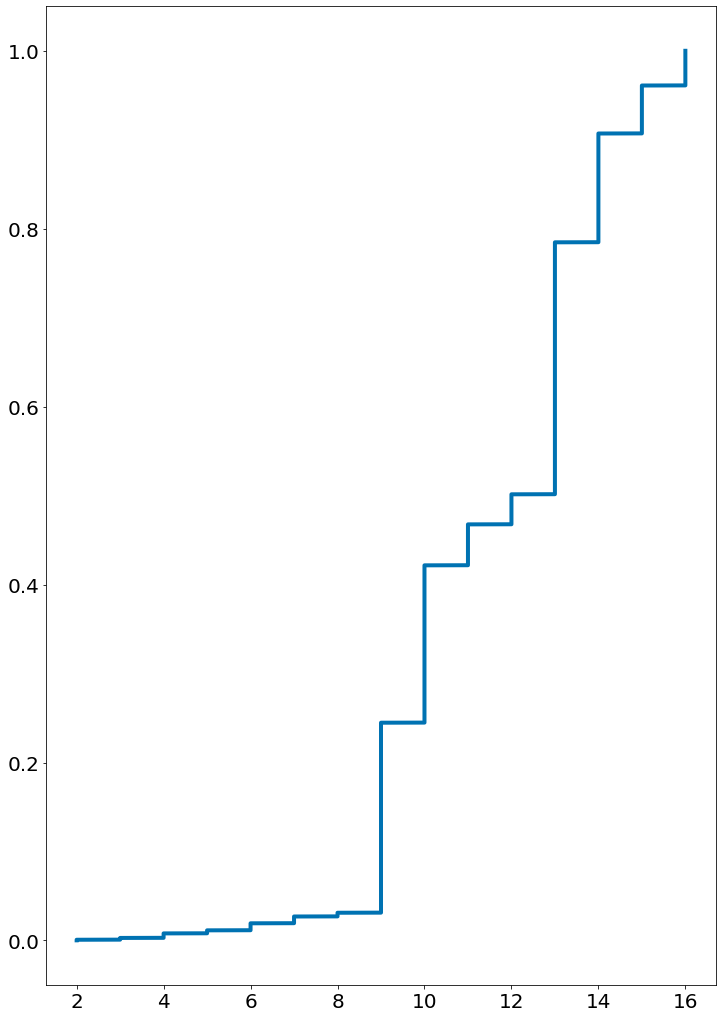

In [87]:
# codigo para importar a função ECDF
from statsmodels.distributions.empirical_distribution import ECDF
sample = salary_above['education_num']
ecdf = ECDF(sample)
plt.plot(ecdf.x, ecdf.y)

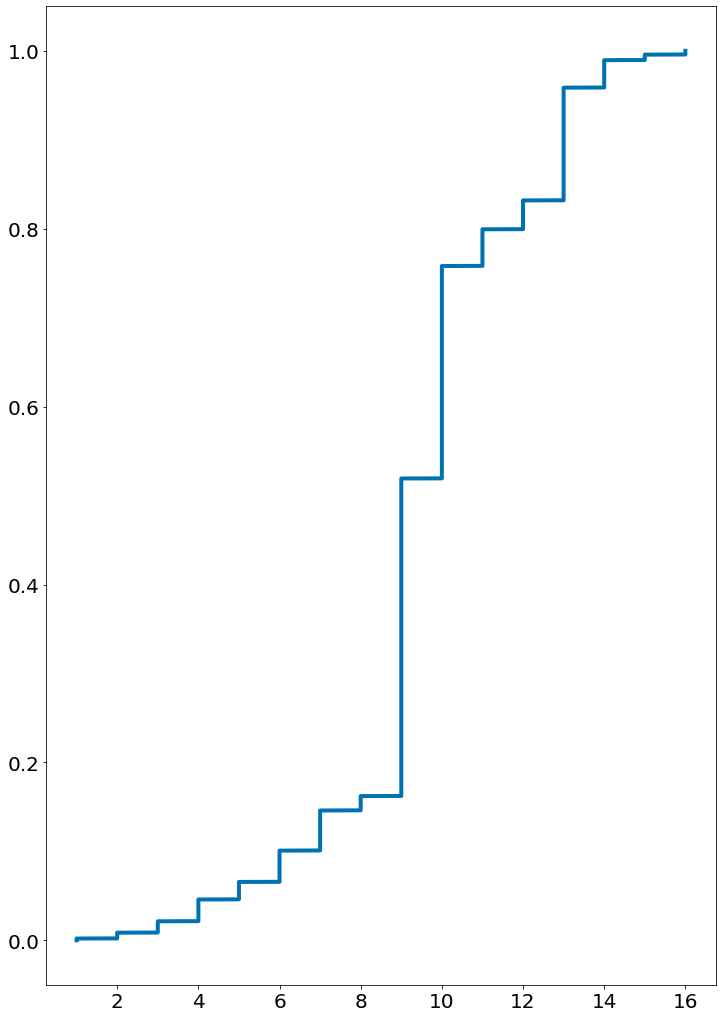

In [88]:
sample = salary_below['education_num']
ecdf = ECDF(sample)
plt.plot(ecdf.x, ecdf.y)

# WorkClass

## Distribuição

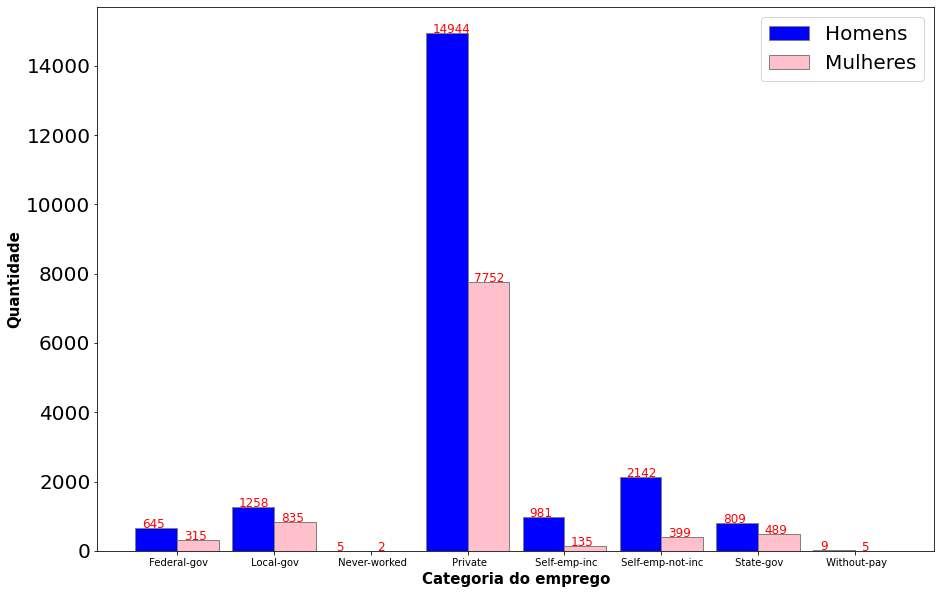

In [89]:
#Plot da Escolaridade
column_name = 'workclass'

new_dataset = dataset.groupby([column_name,'sex'])["age"].count().reset_index(name="count")
new_dataset = new_dataset.drop([0,1], axis=0)
all_marital_status = new_dataset[column_name].unique()

b_width = 0.43

men = list()
women = list()
for item in new_dataset.itertuples():
    if item[2] == " Male":
        men.append(item[3])
    else:
        women.append(item[3])

br1 = np.arange(len(men))
br2 = [x + b_width for x in br1]
fig = plt.subplots(figsize=(15,10))

bar1 = plt.bar(br1, men, color ='b', width = b_width,
        edgecolor ='grey', label ='Homens')
bar2 = plt.bar(br2, women, color ='pink', width = b_width,
        edgecolor ='grey', label ='Mulheres')
bar_list = [bar1, bar2]

plt.xlabel('Categoria do emprego', fontweight ='bold', fontsize = 15)
plt.ylabel('Quantidade', fontweight ='bold', fontsize = 15)

plt.xticks([r + b_width/2 for r in range(len(men))], all_marital_status, fontsize=10, ha="center")
for bars in bar_list:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x()+ 0.07, yval + .05, yval, fontsize=12, color="red", ha="left")
plt.legend()

## Comparação

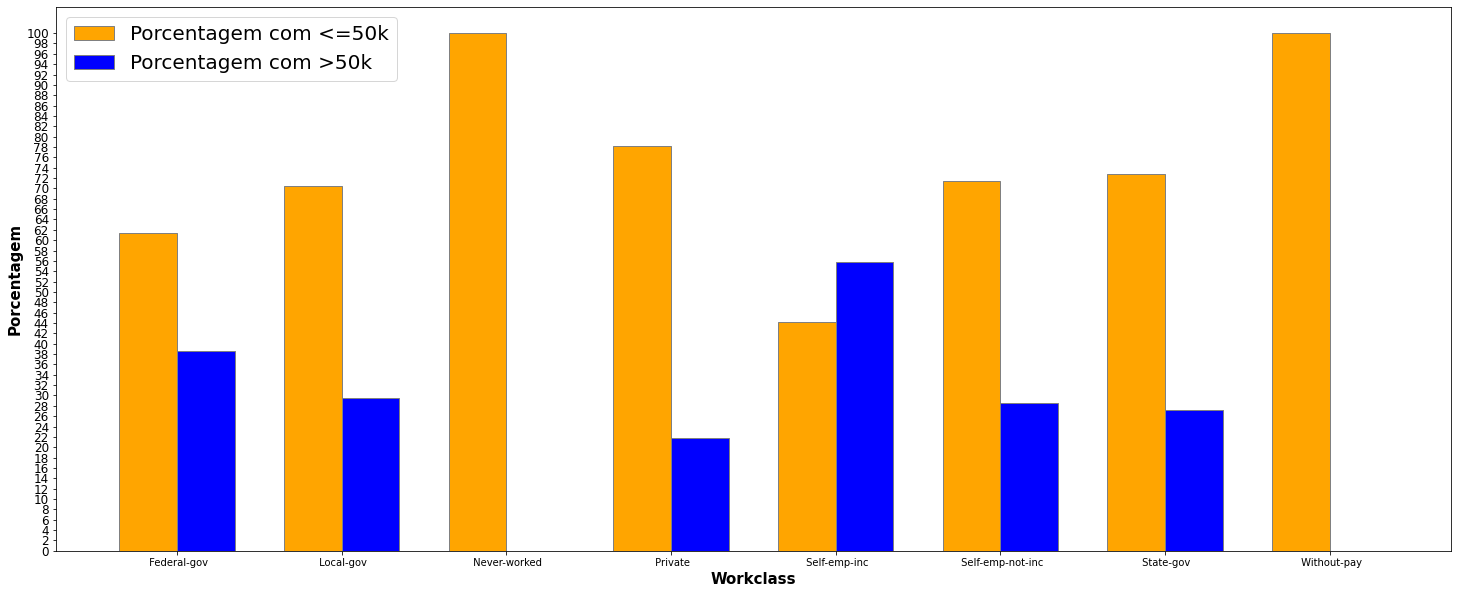

In [90]:
column_name = 'workclass'
#Prepara o dataset
new_dataset = dataset.groupby([column_name, 'salary'])["education_num"].count().reset_index(name="count")
new_dataset = new_dataset.drop([0,1], axis=0)
all_workclass = new_dataset[column_name].unique()

key_list = all_workclass
value_list = np.zeros(len(all_workclass))

workclass_less_dict = dict(zip(key_list, value_list))
workclass_more_dict = dict(zip(key_list, value_list))
workclass_all_dict = dict(zip(key_list, value_list))

# display (new_dataset)

for item in new_dataset.itertuples():
    if item[2] == " <=50K":
        workclass_less_dict[item[1]] = item[3]
    else:
        workclass_more_dict[item[1]] = item[3]
    workclass_all_dict[item[1]] = workclass_all_dict[item[1]] + item[3]

# print(workclass_less_dict)
# print(workclass_more_dict)

# Calcular fração
fraction_less = dict(zip(key_list, value_list))
fraction_more = dict(zip(key_list, value_list))
for key in workclass_all_dict:
    fraction_less[key] = (workclass_less_dict[key] / workclass_all_dict[key])*100
    fraction_more[key] = (workclass_more_dict[key] / workclass_all_dict[key])*100

# print(fraction_less.values())
# print(fraction_more.values())

#Configura a quantidade de barras e o posicionamento das mesmas.

b_width = 0.35
br1 = np.arange(len(fraction_less.values()))
br2 = [x + b_width for x in br1]

fig = plt.subplots(figsize=(25,10))

#Cria as barras.
bar1 = plt.bar(br1, fraction_less.values(), color ='orange', width = b_width,
        edgecolor ='grey', label ='Porcentagem com <=50k')
bar2 = plt.bar(br2, fraction_more.values(), color ='blue', width = b_width,
        edgecolor ='grey', label ='Porcentagem com >50k')
bar_list = [bar1, bar2]

#Nomeia os eixos.
plt.xlabel('Workclass', fontweight ='bold', fontsize = 15) #Lembrar de trocar o xlabel se for usar <<<
plt.ylabel('Porcentagem', fontweight ='bold', fontsize = 15)

#Coloca todas as categorias no eixo X
plt.xticks([r + b_width/2 for r in range(len(fraction_less.values()))], all_workclass, fontsize=10, ha="center")
plt.yticks(np.arange(0, 102, 2),fontsize=12)

plt.legend()

# Race

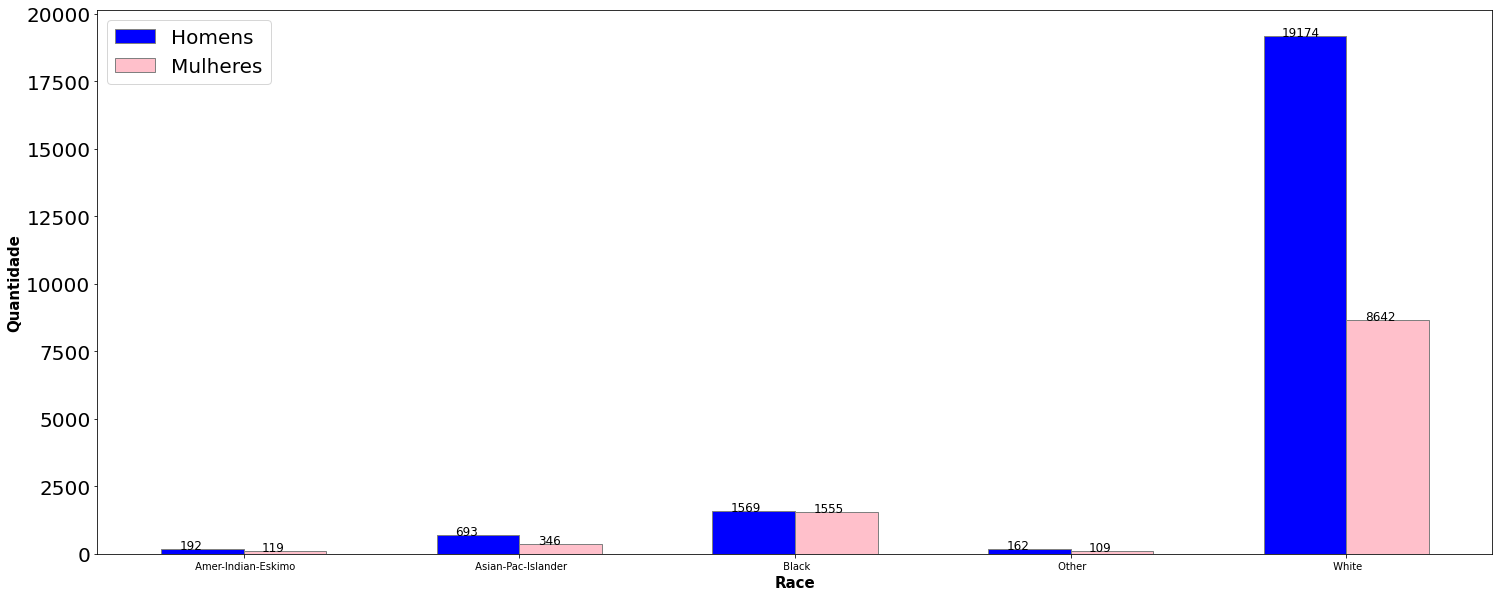

In [91]:
#Race_Plot

column_name = 'race'
#Prepara o dataset
new_dataset = dataset.groupby([column_name,'sex'])["age"].count().reset_index(name="count")
all_race = new_dataset[column_name].unique()
b_width = 0.30


men = list()
women = list()


for item in new_dataset.itertuples():
    if item[2] == " Male":
        men.append(item[3])
    else:
        women.append(item[3])

#Configura a quantidade de barras e o posicionamento das mesmas.
br1 = np.arange(len(men))
br2 = [x + b_width for x in br1]

fig = plt.subplots(figsize=(25,10))

#Cria as barras.
bar1 = plt.bar(br1, men, color ='blue', width = b_width,
        edgecolor ='grey', label ='Homens')
bar2 = plt.bar(br2, women, color ='pink', width = b_width,
        edgecolor ='grey', label ='Mulheres')
bar_list = [bar1, bar2]


plt.xlabel('Race', fontweight ='bold', fontsize = 15)
plt.ylabel('Quantidade', fontweight ='bold', fontsize = 15)


plt.xticks([r + b_width/2 for r in range(len(men))], all_race, fontsize=10, ha="center")


for bars in bar_list:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x()+ 0.067, yval + .05, yval, fontsize=12, color="black", ha="left")

plt.legend()

# Sex

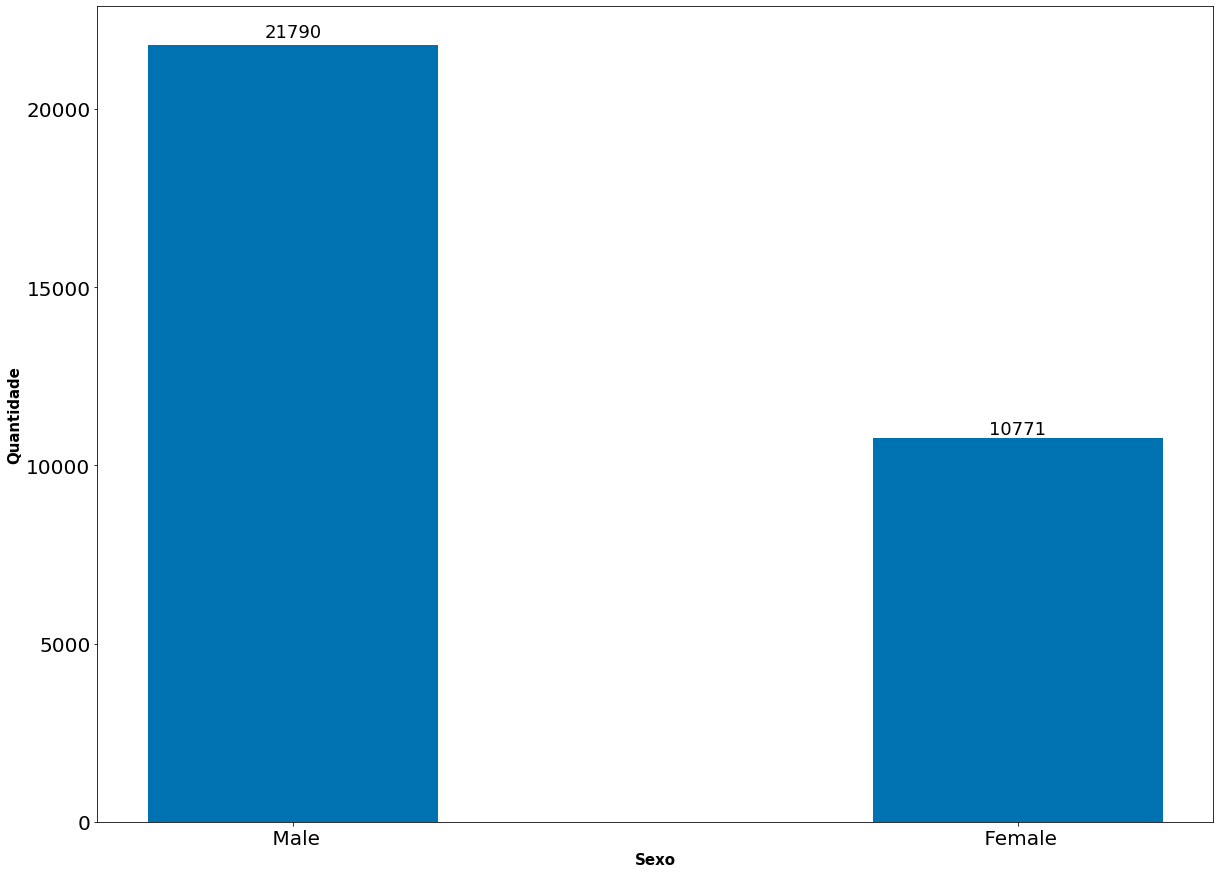

In [92]:
#Sex Plot

sex = dataset.groupby(['sex'])["age"].count().sort_values(ascending=False)
sex_df = pd.DataFrame(sex)
sex_df.columns = ['count']
sex_df = sex_df[sex_df.index != ' ?']
sex_x = np.arange(len(sex_df))*2
plt.subplots(figsize=(20,15))
graph = plt.bar(sex_x,sex_df['count'])
plt.xticks(sex_x, sex_df.index, rotation = '0')
plt.xlabel('Sexo', fontweight ='bold', fontsize = 15)
plt.ylabel('Quantidade', fontweight ='bold', fontsize = 15)
for index, value in enumerate(graph):
  plt.text(sex_x[index], value.get_height() + .01*math.exp(math.log(value.get_height())), value.get_height(), fontsize=18, color="black", ha="center")

# Hours-Per-Week


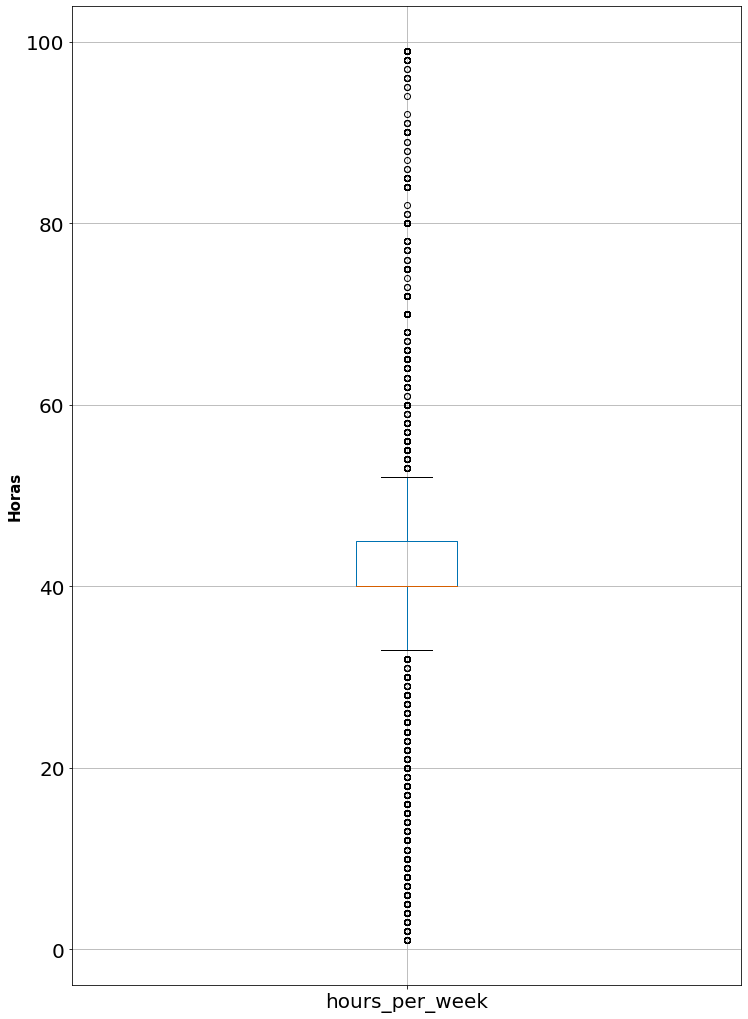

In [93]:
dataset.boxplot(column='hours_per_week')
plt.xlabel('', fontweight ='bold', fontsize = 15)
plt.ylabel('Horas', fontweight ='bold', fontsize = 15)
plt.show()

## IC

In [94]:
def CI(array):
  array = array['hours_per_week']
  array = array.dropna()
  LI = array.mean() - 2.576 * (array.std(ddof=1) / np.sqrt(len(array)))
  LS = array.mean() + 2.576 * (array.std(ddof=1) / np.sqrt(len(array)))
  return (array.mean(), LI, LS)

In [95]:
def addlabels(graph,x,y):
  for index, value in enumerate(graph):
    plt.text(x[index], value.get_height() + .01*math.exp(math.log(value.get_height())), value.get_height(), fontsize=18, color="red", ha="center")

[[0.32037943 0.20183519 0.17626802]
 [0.32037943 0.20183519 0.17626802]]


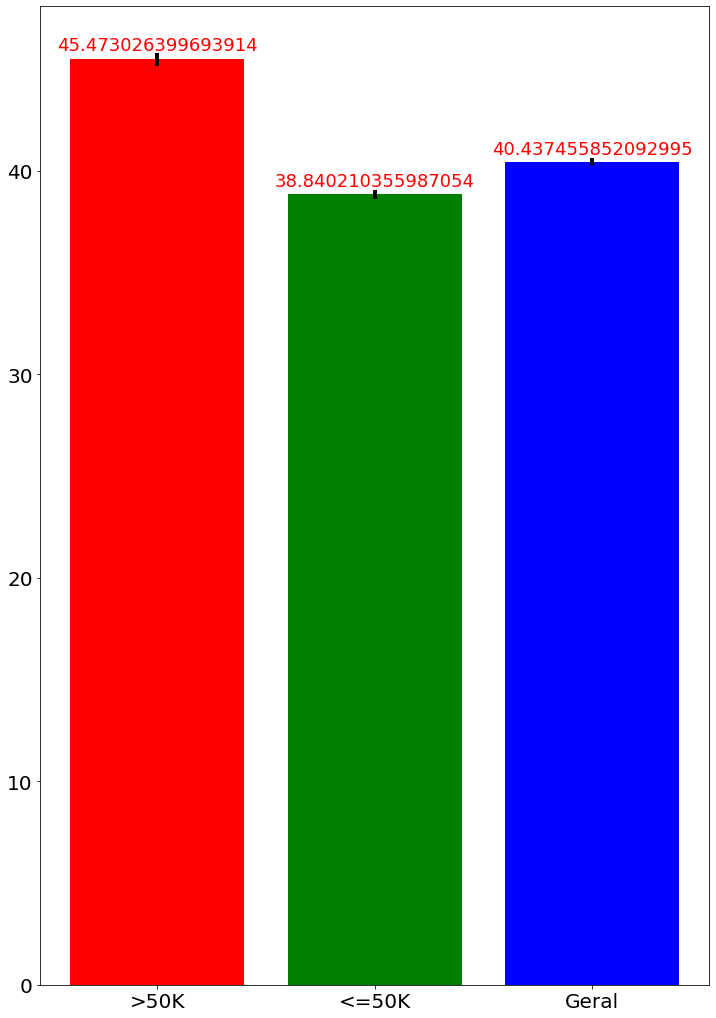

In [96]:
samean, sali, sals = CI(salary_above)
sbmean, sbli, sbls = CI(salary_below)
smean, sli, sls = CI(dataset)

mean = np.array([samean, sbmean, smean])
min = np.array([sali, sbli, sli])
max = np.array([sals, sbls, sls])

colors=["red", "green", "blue"]
yerr = np.c_[mean-min,max-mean].T
print (yerr) # prints [[ 6 10  8  9]
             #         [ 5 10  7  8]]

legend = ['>50K', '<=50K', 'Geral']
graph = plt.bar(legend, mean, yerr=yerr, color=colors)
addlabels(graph,legend,mean)
plt.show()

In [98]:
salary_above = dataset.drop(dataset[(dataset.salary == ' >50K')].index)
salary_below = dataset.drop(dataset[(dataset.salary == ' <=50K')].index)

salary_below.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
